# Embedding of van Gogh Paintings

In [23]:
DATA = '/mnt/files/datasets/vgdb_2016'
PATCHES = F'{DATA}/embed/patches/random_inceptionv3'
LAYER = 'global_average_pooling2d'

## Setup

In [58]:
import os
import joblib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
sns.set()

## Datasets

In [16]:
train, valid, test = (joblib.load(f'{PATCHES}/{p}.0.pickle') for p in ('train', 'valid', 'test'))

In [19]:
info = pd.read_csv(f'{DATA}/vgdb_2016.csv')
info.head()

,PageID,DescriptionURL,ImageURL,ImageSHA1,PixelHeight,PixelWidth,PaintingID,Artist,RealHeightInches,RealWidthInches,DensityHeight,DensityWidth,DensityRatio
0,149071,http://commons.wikimedia.org/wiki/File:Paul_C%...,http://upload.wikimedia.org/wikipedia/commons/...,cdcdeed0d2667884b7362e6e1a0deb5d26d010f6,5700,3952,29.100.65,Paul C\xe9zanne,21.61417,15.23622,263.71585,259.38191,0.01671
1,151874,http://commons.wikimedia.org/wiki/File:Vincent...,http://upload.wikimedia.org/wikipedia/commons/...,fd61fa5a06507e0f2e919eac5828f5c4a2951226,5939,7560,Van Gogh catalogues|F=579|JH=1692,Vincent van Gogh,28.70000,36.20000,206.93380,208.83978,0.00921
2,809945,http://commons.wikimedia.org/wiki/File:Whiteho...,http://upload.wikimedia.org/wikipedia/commons/...,3b52b91662bdef61268b9ba459e04214913142ce,10528,12682,Van Gogh catalogues|F=766|JH=2031,Vincent van Gogh,28.70000,36.20000,366.82927,350.33149,0.04709
3,1595836,http://commons.wikimedia.org/wiki/File:Jean_Ja...,http://upload.wikimedia.org/wikipedia/commons/...,e4355ce986b8c04a8409ee52c68eefdb6bb90bb7,3212,2177,1963.10.33,Jean-Jacques Henner,10.70000,7.40000,300.18692,294.18919,0.02039
4,1869973,http://commons.wikimedia.org/wiki/File:Blake_j...,http://upload.wikimedia.org/wikipedia/commons/...,1c85a5c6399839d4e4e24f060c97807525d6269e,4536,3564,1949.11.12.2,William Blake,14.56693,11.49606,311.39027,310.01918,0.00442


In [25]:
test['data'][LAYER].shape

(6700, 2048)

In [30]:
test['names']

array(['nvg/nvg_10500055-0.jpg', 'nvg/nvg_10500055-1.jpg',
       'nvg/nvg_10500055-10.jpg', ..., 'vg/vg_9516223-97.jpg',
       'vg/vg_9516223-98.jpg', 'vg/vg_9516223-99.jpg'], dtype='<U23')

In [126]:
x = np.concatenate([d['data'][LAYER] for d in (train, valid, test)], axis=0)
y = np.concatenate([d['target'] for d in (train, valid, test)], axis=0)
n = np.concatenate([d['names'] for d in (train, valid, test)])
p = np.asarray([os.path.basename(e).split('-')[0] for e in n])

## Visualizing Paintings

In [127]:
# sampling 10% of the set.
selected = np.random.poisson(0.1, size=len(x)).astype(bool)
x, y, n, p = x[selected], y[selected], n[selected], p[selected]

In [141]:
from sklearn.decomposition import PCA

t = PCA()
z = t.fit_transform(x)

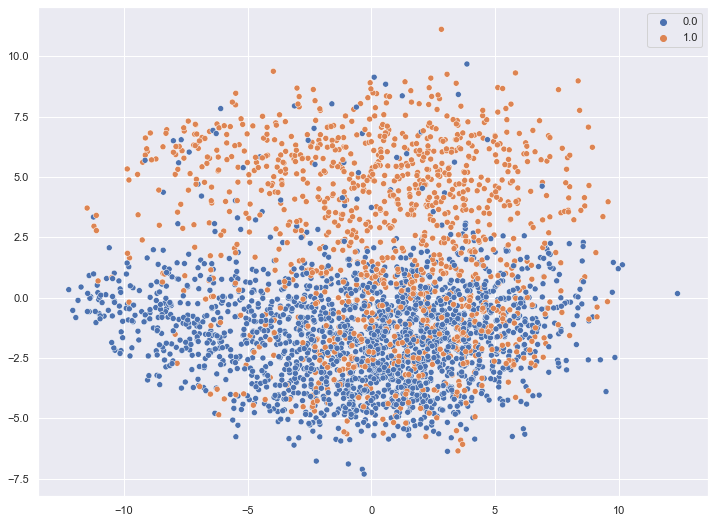

In [147]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=y);

In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

t = LDA()
z = t.fit_transform(x, y)

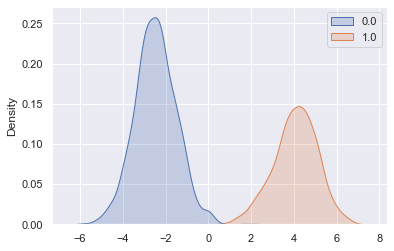

In [136]:
sns.kdeplot(z[:, 0], hue=y, fill=True);

In [148]:
from sklearn.manifold import TSNE

t = TSNE()
z = t.fit_transform(x)

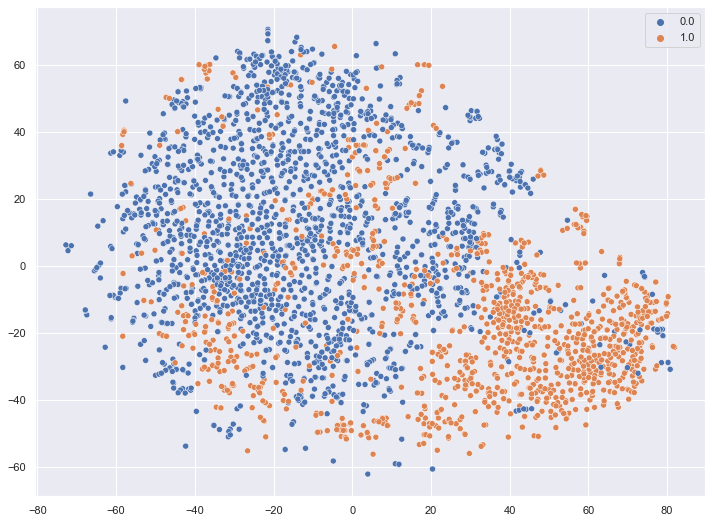

In [149]:
plt.figure(figsize=(12, 9))
sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=y);

In [7]:
import tensorflow as tf

x = tf.keras.applications.DenseNet201(input_shape=(300, 300, 3), weights=None)